In [2]:
"""Volume 3: Web Scraping.
Kameron Lightheart
MATH 403
9/16/2019
"""

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from matplotlib import pyplot as plt

# Problem 1
def prob1():
    # Get source from example.com
    response = requests.get("http://www.example.com")
    # Write the source to a new example.html file
    with open("example.html", "w") as file:
        file.write(response.text)
        
    return response
    
# Problem 2
def prob2():
    """Examine the source code of http://www.example.com. Determine the names
    of the tags in the code and the value of the 'type' attribute associated
    with the 'style' tag.

    Returns:
        (set): A set of strings, each of which is the name of a tag.
        (str): The value of the 'type' attribute in the 'style' tag.
    """
    soup = None
    with open("example.html", "r") as file:
        soup = BeautifulSoup(file)
    tags = { tag.name for tag in soup.find_all() }
    style_value = soup.find_all('style')[0].text
    return tags, style_value


# Problem 3
def prob3(code):
    """Return a list of the names of the tags in the given HTML code."""
    soup = BeautifulSoup(code)
    tags = [ tag.name for tag in soup.find_all() ]
    return tags


# Problem 4
def prob4(filename="example.html"):
    """Read the specified file and load it into BeautifulSoup. Find the only
    <a> tag with a hyperlink and return its text.
    """
    html_soup = BeautifulSoup(prob1().text)
    a_href = html_soup.find("a", attrs={"href": True})
    return a_href.text


# Problem 5
def prob5(filename="san_diego_weather.html"):
    """Read the specified file and load it into BeautifulSoup. Return a list
    of the following tags:

    1. The tag containing the date 'Thursday, January 1, 2015'.
    2. The tags which contain the links 'Previous Day' and 'Next Day'.
    3. The tag which contains the number associated with the Actual Max
        Temperature.

    Returns:
        (list) A list of bs4.element.Tag objects (NOT text).
    """
    soup = None
    with open(filename, "r") as file:
        soup = BeautifulSoup(file)
    return_list = []
    return_list.append(soup.find(string="Thursday, January 1, 2015").parent)
    tags_2 = soup.find_all(string=re.compile(r"(Previous Day|Next Day)"))
    return_list.append([tag.parent for tag in tags_2])
    
    parent = soup.find(string="Max Temperature").parent.parent.parent
    child = parent.find("span", {"class": "wx-value"})
    return_list.append(child)
    
    return return_list


# Problem 6
def prob6(filename="large_banks_index.html"):
    """Read the specified file and load it into BeautifulSoup. Return a list
    of the tags containing the links to bank data from September 30, 2003 to
    December 31, 2014, where the dates are in reverse chronological order.

    Returns:
        (list): A list of bs4.element.Tag objects (NOT text).
    """
    soup = None
    with open(filename, "r") as file:
        soup = BeautifulSoup(file)
    dates = soup.find_all("a", string=re.compile(r"[A-z]+ [0-9]+, [0-9]+"))
    return dates[1:]


# Problem 7
def prob(filename="large_banks_data.html"):
    """Read the specified file and load it into BeautifulSoup. Create a single
    figure with two subplots:

    1. A sorted bar chart of the seven banks with the most domestic branches.
    2. A sorted bar chart of the seven banks with the most foreign branches.

    In the case of a tie, sort the banks alphabetically by name.
    """
    soup = None
    with open(filename, "r") as file:
        soup = BeautifulSoup(file)
    table = soup.find("table", {"cellpadding": "7"})
    df = pd.read_html(str(table))[0]
    return df
    


In [88]:
html = prob1()

In [68]:
prob3(html.text)

['html',
 'head',
 'title',
 'meta',
 'meta',
 'meta',
 'style',
 'body',
 'div',
 'h1',
 'p',
 'p',
 'a']

In [69]:
tag = prob4()
tag

'More information...'

In [126]:
prob5()

[<h2 class="history-date">Thursday, January 1, 2015</h2>,
 [<a href="/history/airport/KSAN/2014/12/31/DailyHistory.html">« Previous Day</a>,
  <a href="/history/airport/KSAN/2015/1/2/DailyHistory.html">Next Day »</a>],
 <span class="wx-value">59</span>]

In [135]:
prob6()

[<a href="http://www.federalreserve.gov/releases/lbr/20141231/default.htm">December 31, 2014</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20140930/default.htm">September 30, 2014</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20140630/default.htm">June 30, 2014</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20140331/default.htm">March 31, 2014</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20131231/default.htm">December 31, 2013</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20130930/default.htm">September 30, 2013</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20130630/default.htm">June 30, 2013</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20130331/default.htm">March 31, 2013</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20121231/default.htm">December 31, 2012</a>,
 <a href="http://www.federalreserve.gov/releases/lbr/20120930/default.htm">September 30, 2012</a>,
 <a href="http://www.federalres

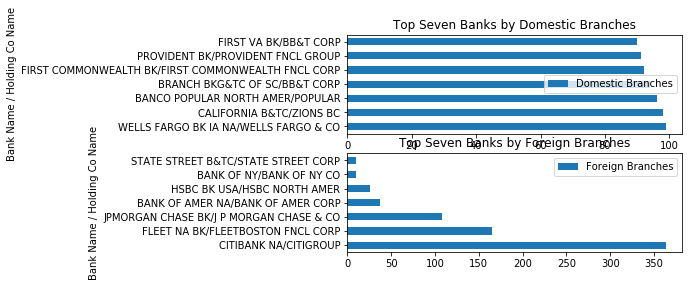

In [33]:
fig, axes = plt.subplots(2,1)

df = prob()
df1 = df.copy()
domestic = df1.sort_values(["Domestic Branches"], ascending=False)[:7]
domestic["Domestic Branches"] = domestic["Domestic Branches"].astype(float)
domestic.plot.barh(y="Domestic Branches", x="Bank Name / Holding Co Name" 
                   , title="Top Seven Banks by Domestic Branches", ax=axes[0])

df["Foreign Branches"] = pd.to_numeric(df["Foreign Branches"], errors="coerce")
foreign = df.sort_values(["Foreign Branches"], ascending=False)[:7]
foreign["Foreign Branches"] = pd.to_numeric(foreign["Foreign Branches"], errors="coerce")
foreign.sort_values(["Foreign Branches"], ascending=False)
foreign.plot.barh(y="Foreign Branches", x="Bank Name / Holding Co Name"
                  , title="Top Seven Banks by Foreign Branches", ax=axes[1])

plt.show()
